In [2]:
using DifferentialEquations, Plots, LaTeXStrings, Printf, LinearAlgebra
pgfplotsx()

Plots.PGFPlotsXBackend()

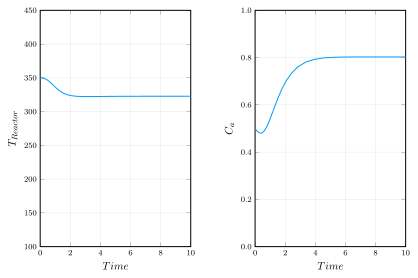

In [44]:
function CSTR(du,u,p,t)
    q = p[1]
    Cai = 0.9
    Ti = 350.0
    V = 100
    ρ = 1000.0
    C = 0.239
    E_R = 8750.0
    k0 = 7.2e10
    UA = 5.0e4
    Tc = p[2]
    ΔHr = 5.0e4
    k = k0*exp(-E_R/u[1])
    
    du[1] = (ρ*q*C*(Ti - u[1]) + (ΔHr)*V*k*u[2] + UA*(Tc - u[1]))/(V*ρ*C) # Energy Balance (T)
    du[2] = (q*(Cai - u[2]) - V*k*u[2])/V # Ca
end

p = [100, 300] # q, Tc

u0 = [350.0;0.5]
tspan = (0.0,20.0)
prob = ODEProblem(CSTR,u0,tspan,p)
sol = solve(prob, RK4())

p1 = plot(sol.t, sol[1,:], framestyle = :box, ylim = (100, 450), xlim = (0,10), ylab = L"T_{Reactor}", xlab = L"Time", label = "")
p2 = plot(sol.t, sol[2,:], framestyle = :box, ylim = (0, 1), xlim = (0,10), ylab = L"C_{a}", xlab = L"Time", label = "")

plot(p1,p2)

In [45]:
function Cost(p)
    u0 = [350.0;0.5]
    tspan = (0.0,20.0)
    prob = ODEProblem(CSTR,u0,tspan,p)
    sol = solve(prob, Rosenbrock23())
    
    return abs(sol[2,end] - 0.4)
end

Cost (generic function with 1 method)

In [46]:
using LinearAlgebra

basis(i, n) = [k == i ? 1.0 : 0.0 for k in 1 : n]
function hooke_jeeves(f, x, α, ϵ, γ=0.5)
    y, n = f(x), length(x)
    
    while α > ϵ
        improved = false
        x_best, y_best = x, y
     
        for i in 1:n
            for sgn in (-1,1)
                x′ = x + sgn*α*basis(i, n)
                y′ = f(x′)
                
                if y′ < y_best
                    x_best, y_best, improved = x′, y′, true
                end
            end
        end
    
        x, y = x_best, y_best
        if !improved
            α *= γ
        end
    end
    return x
end

hooke_jeeves (generic function with 2 methods)

In [47]:
p = hooke_jeeves(Cost, [100.0,300.0], 0.1, 0.0001, 0.5)

2-element Array{Float64,1}:
 100.2421875
 306.30000000000143

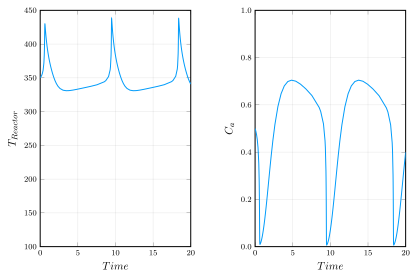

In [48]:
u0 = [350.0;0.5]
tspan = (0.0,20.0)
prob = ODEProblem(CSTR,u0,tspan,p)
sol = solve(prob, Rosenbrock23())

p1 = plot(sol.t, sol[1,:], framestyle = :box, ylim = (100, 450), xlim = (0,20), ylab = L"T_{Reactor}", xlab = L"Time", label = "")
p2 = plot(sol.t, sol[2,:], framestyle = :box, ylim = (0, 1), xlim = (0,20), ylab = L"C_{a}", xlab = L"Time", label = "")

plot(p1,p2)